In [1]:
import nltk
from nltk.tree import Tree
import matplotlib.pyplot as plt
import networkx as nx

# Drawing the parse trees
def nltk_tree_to_networkx(tree):
    G=nx.Graph()
    labels= {}
    def add_edges(tree, parent=None):
        if isinstance(tree,nltk.Tree):
            node=id(tree)
            labels[node]=tree.label()
            if parent is not None:
                G.add_edge(parent,node)
            for child in tree:
                add_edges(child,node)
        else:
            node=id(tree)
            labels[node]=tree
            if parent is not None:
                G.add_edge(parent,node)
    add_edges(tree)
    return G,labels
def draw_tree(tree):
    G,labels = nltk_tree_to_networkx(tree)
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12,8))
    nx.draw(G,pos,labels=labels,with_labels=True,node_size=500,node_color='skyblue',font_size=10,font_color='black',font_weight='bold',edge_color='gray')
    plt.show()
  

In [2]:

# Spanish sentence parse tree
spanish_tree = Tree('S', [
    Tree('AdvP', [Tree('Adv', ['Todavía'])]),
    Tree('VP', [
        Tree('V', ['recuerdo']),
        Tree('NP', [
            Tree('Det', ['aquel']),
            Tree('N', ['amanecer'])
        ]),
        Tree('CP', [
            Tree('C', ['en']),
            Tree('S', [
                Tree('NP', [
                    Tree('Det', ['mi']),
                    Tree('N', ['padre'])
                ]),
                Tree('VP', [
                    Tree('V', ['me llevó']),
                    Tree('PP', [
                        Tree('P', ['por']),
                        Tree('NP', [
                            Tree('Det', ['primera']),
                            Tree('N', ['vez'])
                        ])
                    ]),
                    Tree('PP', [
                        Tree('P', ['a']),
                        Tree('VP', [
                            Tree('V', ['visitar']),
                            Tree('NP', [
                                Tree('Det', ['el']),
                                Tree('N', ['Cementerio de los Libros Olvidados'])
                            ])
                        ])
                    ])
                ])
            ])
        ])
    ])
])


       
    

In [3]:
# English sentence parse tree 
english_tree = Tree('S', [
    Tree('NP', [Tree('PRP', ['I'])]),
    Tree('AdvP', [Tree('RB', ['still'])]),
    Tree('VP', [
        Tree('V', ['remember']),
        Tree('NP', [
            Tree('Det', ['the']),
            Tree('N', ['day'])
        ]),
        Tree('CP', [
            Tree('C', ['that']),
            Tree('S', [
                Tree('NP', [
                    Tree('PRP$', ['my']),
                    Tree('N', ['father'])
                ]),
                Tree('VP', [
                    Tree('V', ['took']),
                    Tree('NP', [Tree('PRP', ['me'])]),
                    Tree('PP', [
                        Tree('P', ['to']),
                        Tree('NP', [
                            Tree('Det', ['the']),
                            Tree('N', ['Cemetery of Forgotten Books'])
                        ])
                    ]),
                    Tree('PP', [
                        Tree('P', ['for']),
                        Tree('NP', [
                            Tree('Det', ['the']),
                            Tree('N', ['first time'])
                        ])
                    ])
                ])
            ])
        ])
    ])
])

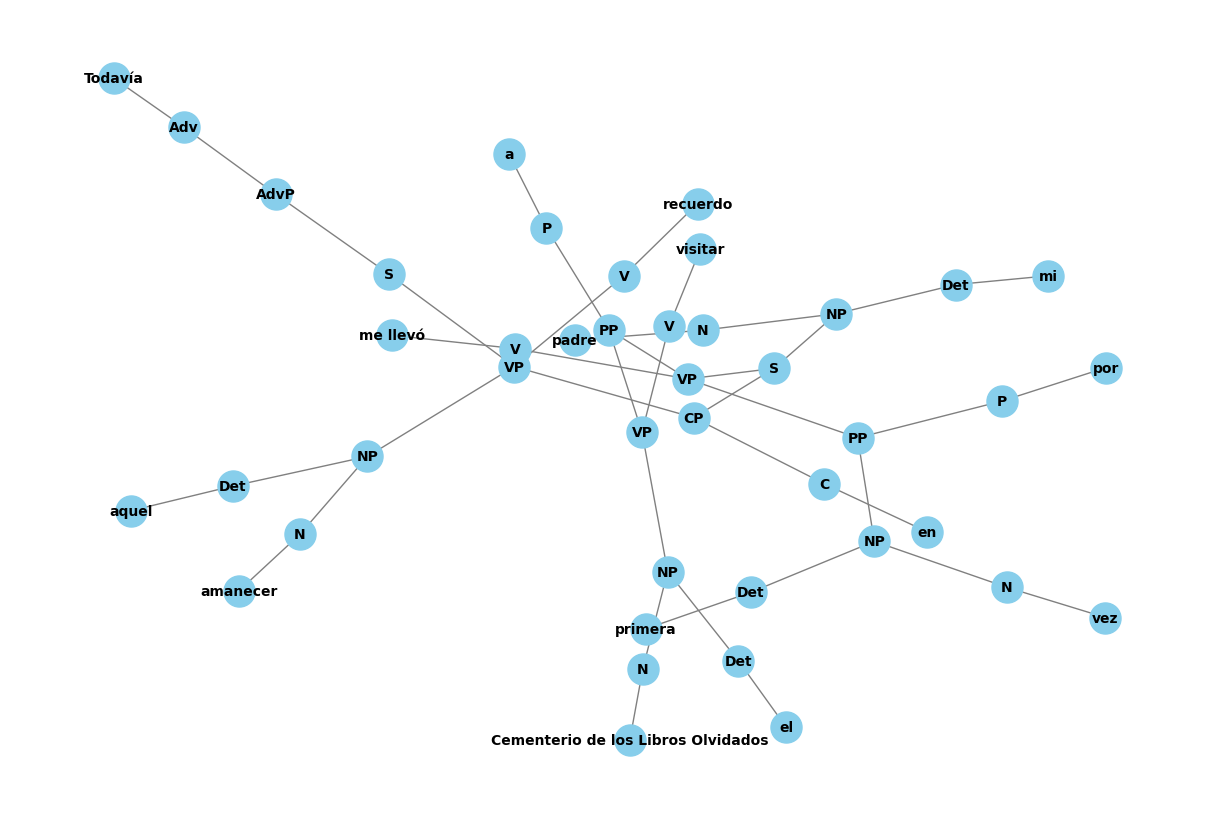

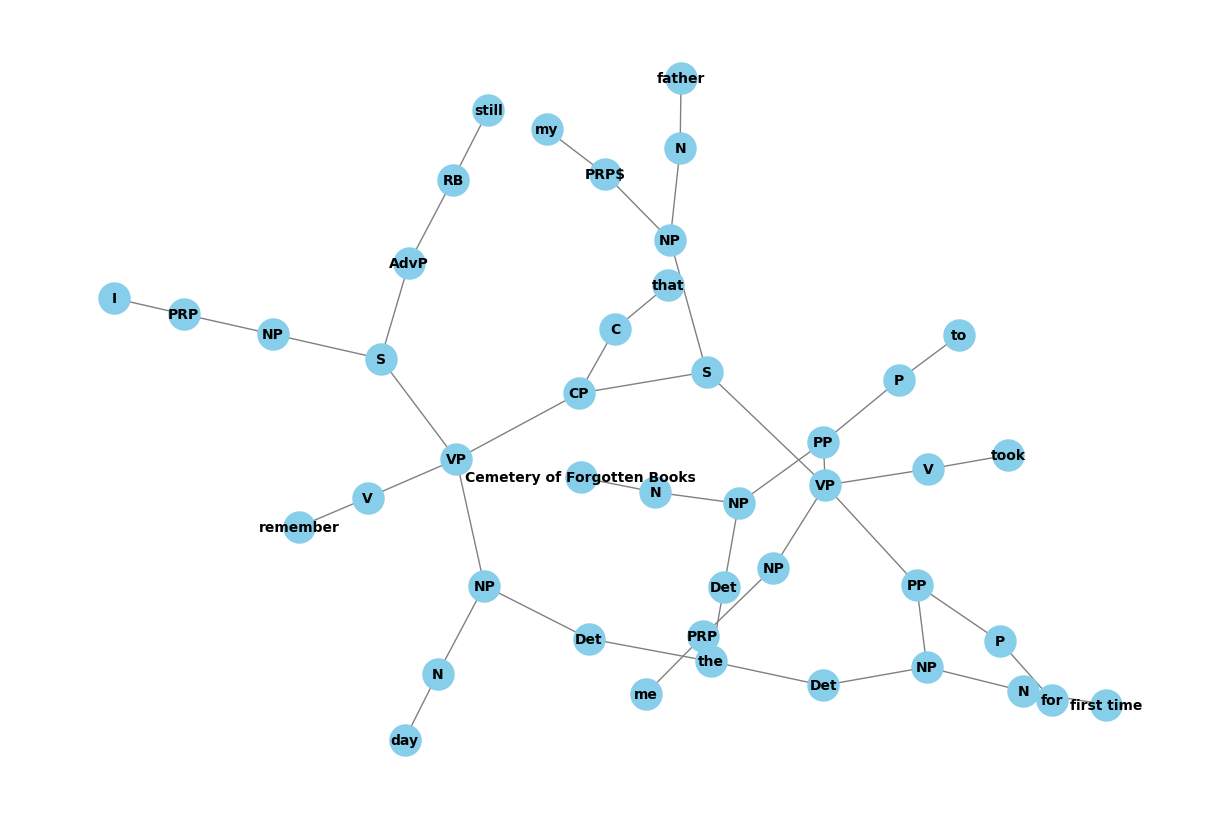

In [4]:
draw_tree(spanish_tree)
draw_tree(english_tree)